<a href="https://colab.research.google.com/github/chandrashekarswamy/EVA-Phase-01/blob/master/Assignment%2005/Assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

### PLAN to improvise

1.  Use batch normalization to improve the accuracy.
2.  Use LR schedular
3.  Play with number of epoches & Batch size.


In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
#importing all the necessary libraries 
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

#mnist is the data base (contains labled dataset)
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
#Loading the training and test sets to X_train, y_train and X_test and y_test
#Respectively from mnist data base
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


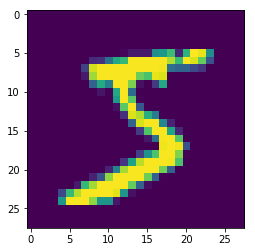

In [4]:
#Print the training data using matplot library,
#matplotlib inline is needed when we run using browser
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline

#See the share of first image
plt.imshow(X_train[0])

In [0]:
#Kears need (n, width, hight, depth) mnist have only (n, w, h) in mnist
#we know its a Grey scale so we keep depth as 1
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#convert our data type to float32 
#Normalize values to the range [0, 1].
#X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')
#X_train /= 255
#X_test /= 255

In [7]:
#Print 10 values of training dataset
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
#print the training data set after converting 1-D array to 10-D array
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), X_test.std()))
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
datagen.fit(X_train)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), X_test.std()))
# create generator that centers pixel values
datagen_test = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
datagen_test.fit(X_test)
print('Data Generator mean=%.3f, std=%.3f' % (datagen_test.mean, datagen_test.std))

from keras.layers import Activation
#Declare the sequential keras model
model = Sequential()

#we are adding the first convolution layer with input of (w,h,d)
#32 = numer of convolutions(kernels), 3,3 is row col of kernels so its 3*3
#Activation = 'relu' this will be used to normalise the values between 0-1
#Receptive field of this layer = 3*3 input channel = 28*28*1
model.add(Convolution2D(12, 3, 3, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu', input_shape=(28,28,1))) #26

model.add(BatchNormalization())
model.add(Convolution2D(12, 3, 3, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))  #24

model.add(BatchNormalization())
model.add(Convolution2D(12, 3, 3, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))  #22

model.add(Convolution2D(16, 1, activation='relu'))     #22
model.add(MaxPooling2D(pool_size=(2, 2)))              #11

model.add(BatchNormalization())
model.add(Convolution2D(12, 3, 3, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))  #9

model.add(BatchNormalization())
model.add(Convolution2D(12, 3, 3, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))  #7

model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))  #5

model.add(Convolution2D(10, 5, 5))                     #1

#result should be converted back to 1-D array, to show as 0-9
model.add(Flatten())
model.add(Activation('softmax'))

#will give the summary of the model
model.summary()

Statistics train=33.318 (78.567), test=33.791 (79.172)
Data Generator mean=33.318, std=78.567
Statistics train=33.318 (78.567), test=33.791 (79.172)
Data Generator mean=33.791, std=79.172
Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg..., activation="relu", input_shape=(28, 28, 1...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg..., activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg..., activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg..., activation="relu")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 12)        120       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 12)        48        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 12)        1308      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 12)        48        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 12)        1308      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 16)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg..., activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg..., activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (5, 5))`


In [0]:
# this is to compile the model 
#NOTE: we can use different loss function and optimizer
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [12]:
#Here we diclared batch size of 256 so 10000/256 batches + declared 20 epoch
model.fit(X_train, Y_train, batch_size=128, nb_epoch=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 9s 155us/step - loss: 0.4140 - acc: 0.9437 - val_loss: 0.1963 - val_acc: 0.9690
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 93us/step - loss: 0.1230 - acc: 0.9802 - val_loss: 0.1394 - val_acc: 0.9729
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 6s 92us/step - loss: 0.1030 - acc: 0.9826 - val_loss: 0.1342 - val_acc: 0.9735
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 6s 92us/step - loss: 0.0860 - acc: 0.9855 - val_loss: 0.0782 - val_acc: 0.9879
Epoch 5/40

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [=========

In [0]:
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')

#evaluate the model 
score = model.evaluate(X_test, Y_test, verbose=0)

In [14]:
#print the score
print(score)

[0.03756964138299227, 0.9912]


### **OBSERVATION** 
    we achieved 99.40 validation accuracy at 19th epoch with 12K parameters and 99.35 at end
        
    Used batch normalization and LR schedular and sticked to batch size of 128



In [0]:
#Predict the number present in X_test 
y_pred = model.predict(X_test)

In [16]:
#y_pred is predected value y_test is actual test value.
print(y_pred[:9])
print(y_test[:9])

[[1.06597495e-10 2.20522921e-07 1.00939792e-06 7.52913394e-08
  1.41788761e-10 2.74892054e-11 1.70236639e-15 9.99998689e-01
  1.68794062e-10 2.71431411e-08]
 [8.01738315e-06 4.30357858e-07 9.99988317e-01 3.33804762e-09
  5.64002463e-08 4.25659299e-11 2.94271581e-06 1.31272504e-09
  2.95601268e-07 8.33289202e-11]
 [3.28413075e-09 9.99989271e-01 1.87256276e-07 5.76895254e-10
  8.23640494e-06 2.09241180e-09 3.42379053e-07 1.73101762e-06
  6.00934840e-08 5.38841771e-09]
 [9.99922752e-01 9.03176595e-14 4.74934616e-08 5.99723249e-09
  2.54240362e-08 6.73219347e-08 7.50987238e-05 3.14851611e-08
  1.61714797e-06 4.45476758e-07]
 [1.58421373e-10 1.00983089e-09 5.28603117e-09 4.42904047e-11
  9.99998927e-01 2.03035557e-11 5.54908008e-10 3.12310284e-08
  1.43107684e-07 9.30023475e-07]
 [2.78795587e-09 9.99995112e-01 4.86459797e-08 1.38959372e-10
  4.06375284e-06 6.76444178e-10 1.11226520e-07 7.38387939e-07
  4.93246617e-08 3.57271213e-09]
 [1.20317534e-13 5.18128718e-06 1.13788144e-06 7.14078172e